# XGBoost Classifier

# Necessary imports

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

## Read Data

In [86]:
DATASET_DIR = '../../Dataset/body_level_classification_train.csv'
df = pd.read_csv(DATASET_DIR)

## Explore Data

In [87]:
df.head()

,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Phys_Act,Time_E_Dev,Transport,Body_Level
0,Female,22.547298,1.722461,51.881263,yes,2.663421,1.041110,no,no,3.000000,Frequently,yes,no,0.794402,1.391948,Public_Transportation,Body Level 1
1,Male,19.799054,1.743702,54.927529,yes,2.000000,2.847264,Sometimes,no,3.289260,Sometimes,yes,no,1.680844,2.000000,Public_Transportation,Body Level 1
2,Female,17.823438,1.708406,50.000000,yes,1.642241,1.099231,Sometimes,no,3.452590,Sometimes,no,no,0.418875,1.000000,Public_Transportation,Body Level 1
3,Female,19.007177,1.690727,49.895716,yes,1.212908,1.029703,Sometimes,no,3.207071,Sometimes,no,no,2.000000,1.000000,Public_Transportation,Body Level 1
4,Male,19.729250,1.793315,58.195150,yes,2.508835,2.076933,no,no,3.435905,Sometimes,yes,no,2.026668,1.443328,Automobile,Body Level 1


In [88]:
# number of samples
print("Number of samples: ", len(df))
# number of features
print("Number of features: ", len(df.columns) - 1)
# print number of classes (Body_Level)
print("Number of classes: ", len(df['Body_Level'].unique()))

# print number of samples for each class
print(df['Body_Level'].value_counts())

Number of samples:  1477
Number of features:  16
Number of classes:  4
Body Level 4    680
Body Level 3    406
Body Level 2    201
Body Level 1    190
Name: Body_Level, dtype: int64


In [89]:
# is there any missings?
print("Number of missings: ", df.isnull().sum().sum())

Number of missings:  0


## Let's Prepare the Data for the model

### convert categorical values to numerical values

In [90]:
le = LabelEncoder()
for col in df.columns:
    # check if the column contains string values
    if df[col].dtype == 'object':
        # fit the LabelEncoder to the column and transform the values
        df[col] = le.fit_transform(df[col])

df.head()

,Gender,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,Fam_Hist,H_Cal_Burn,Phys_Act,Time_E_Dev,Transport,Body_Level
0,0,22.547298,1.722461,51.881263,1,2.663421,1.041110,3,0,3.000000,1,1,0,0.794402,1.391948,3,0
1,1,19.799054,1.743702,54.927529,1,2.000000,2.847264,2,0,3.289260,2,1,0,1.680844,2.000000,3,0
2,0,17.823438,1.708406,50.000000,1,1.642241,1.099231,2,0,3.452590,2,0,0,0.418875,1.000000,3,0
3,0,19.007177,1.690727,49.895716,1,1.212908,1.029703,2,0,3.207071,2,0,0,2.000000,1.000000,3,0
4,1,19.729250,1.793315,58.195150,1,2.508835,2.076933,3,0,3.435905,2,1,0,2.026668,1.443328,0,0


### Let's add new synthetic features 🙈

Body Mass Index (BMI) 📏

In [91]:
# add body mass index (BMI) column
df['BMI'] = df['Weight'] / (df['Height'] / 100) ** 2

### Let's Split the Data

In [92]:
# split dataset into trian and test
from sklearn.model_selection import train_test_split

X = df.drop('Body_Level', axis=1)
y = df['Body_Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Let's make the data balanced

In [93]:
#TODO: 

## XGBoost Classifier <font color='pink'>Trial 1</font>

In [94]:
# define the parameters for xgboost
params1 = {
    'max_depth': 3,
    'eta': 0.3,
    'objective': 'multi:softprob',
    'num_class': 4
}


# use xgboost
model = XGBClassifier(**params1)
model.fit(X_train, y_train)




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.3, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_class=4, num_parallel_tree=None, ...)

Accuracy:  1.0
F1 score:  1.0
Confusion matrix: 
 [[ 31   0   0   0]
 [  0  45   0   0]
 [  0   0  82   0]
 [  0   0   0 138]]
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        45
           2       1.00      1.00      1.00        82
           3       1.00      1.00      1.00       138

    accuracy                           1.00       296
   macro avg       1.00      1.00      1.00       296
weighted avg       1.00      1.00      1.00       296



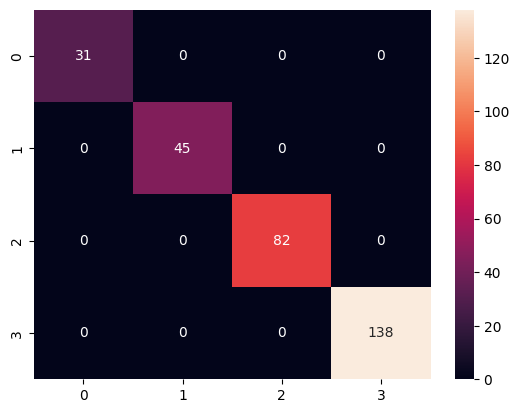

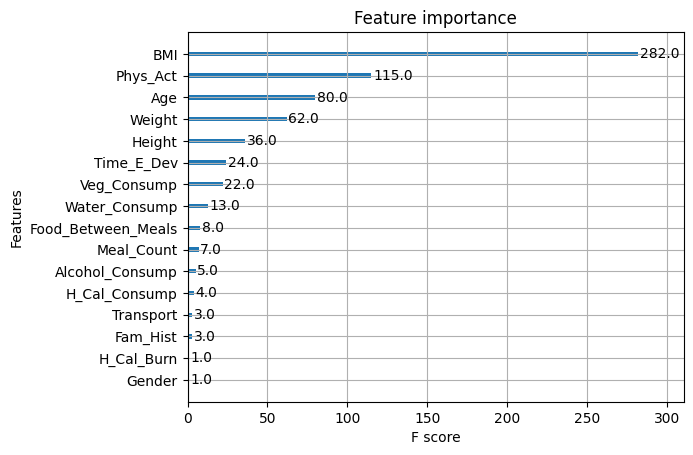

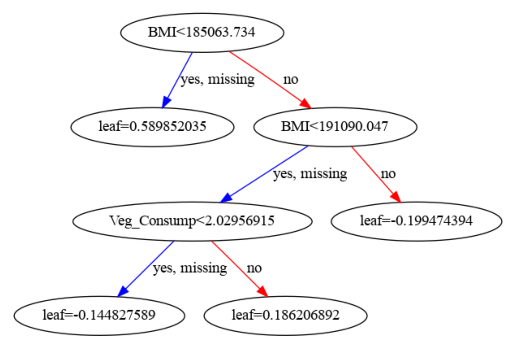

In [99]:
# predict the test set
y_pred = model.predict(X_test)

# print the accuracy score
from sklearn.metrics import accuracy_score

print("Accuracy: ", accuracy_score(y_test, y_pred))

# print f1 score
from sklearn.metrics import f1_score

print("F1 score: ", f1_score(y_test, y_pred, average='macro'))

# print confusion matrix
from sklearn.metrics import confusion_matrix

print("Confusion matrix: \n", confusion_matrix(y_test, y_pred))

# print classification report
from sklearn.metrics import classification_report

print("Classification report: \n", classification_report(y_test, y_pred))


# plot confusion matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d')

plt.show()


# plot feature importance   

from xgboost import plot_importance

plot_importance(model)

plt.show()

# plot decision tree

from xgboost import plot_tree

plot_tree(model)

plt.show()